Epoch 1/30
469/469 - 5s - 11ms/step - accuracy: 0.9333 - loss: 0.2158 - val_accuracy: 0.9792 - val_loss: 0.0637
Epoch 2/30
469/469 - 1s - 3ms/step - accuracy: 0.9815 - loss: 0.0603 - val_accuracy: 0.9831 - val_loss: 0.0478
Epoch 3/30
469/469 - 1s - 3ms/step - accuracy: 0.9867 - loss: 0.0409 - val_accuracy: 0.9894 - val_loss: 0.0334
Epoch 4/30
469/469 - 1s - 3ms/step - accuracy: 0.9899 - loss: 0.0319 - val_accuracy: 0.9895 - val_loss: 0.0315
Epoch 5/30
469/469 - 1s - 3ms/step - accuracy: 0.9922 - loss: 0.0250 - val_accuracy: 0.9905 - val_loss: 0.0256
Epoch 6/30
469/469 - 1s - 3ms/step - accuracy: 0.9939 - loss: 0.0192 - val_accuracy: 0.9875 - val_loss: 0.0438
Epoch 7/30
469/469 - 1s - 3ms/step - accuracy: 0.9944 - loss: 0.0172 - val_accuracy: 0.9890 - val_loss: 0.0347
Epoch 8/30
469/469 - 1s - 3ms/step - accuracy: 0.9947 - loss: 0.0157 - val_accuracy: 0.9888 - val_loss: 0.0361
Epoch 9/30
469/469 - 1s - 3ms/step - accuracy: 0.9962 - loss: 0.0116 - val_accuracy: 0.9897 - val_loss: 0.0393


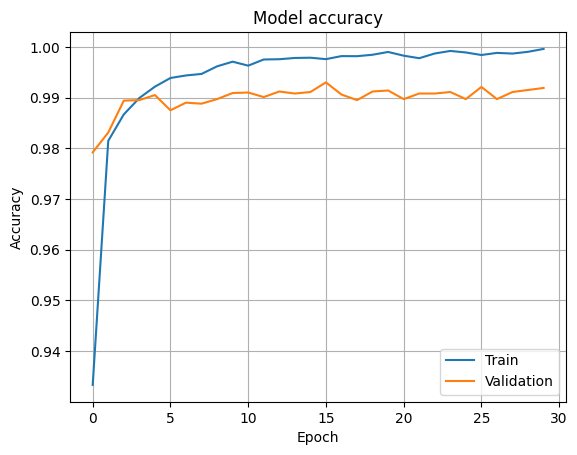

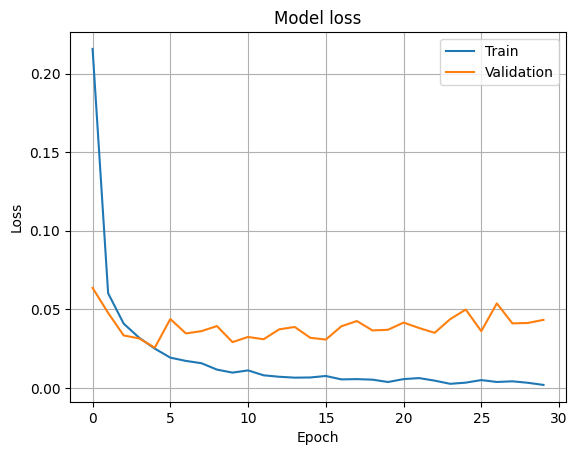

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# LeNet-5 신경망 모델 설계
cnn = Sequential()
cnn.add(Conv2D(6, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(16, (5, 5), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(120, (5, 5), padding='same', activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(84, activation='relu'))
cnn.add(Dense(10, activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
hist = cnn.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test), verbose=2)

res=cnn.evaluate(x_test, y_test, verbose=0)
print('정확률은', res[1]*100)

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

# 손실함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()